# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder,StandardScaler, PolynomialFeatures 
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import Lasso, Ridge, LassoCV,LinearRegression
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import  mean_squared_error, make_scorer, r2_score
from sklearn.feature_selection import RFE
from sklearn.decomposition import TruncatedSVD

In [75]:
#Importing data
df=pd.read_csv("data\\vehicles.csv")

In [76]:
#Investigating data quality
df.info()
df.head()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
count,4.268800e+05,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,423867,4.224800e+05,418638,424324,265838,296313,120519,334022,296677,426880
unique,NaN,404,NaN,NaN,42,29649,6,8,5,NaN,6,3,118246,3,4,13,12,51
top,NaN,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,NaN,3608,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,50614
mean,7.311487e+09,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,9.804333e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.473170e+06,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,NaN,2.138815e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.207408e+09,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.308143e+09,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,3.770400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.312621e+09,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.554800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.315254e+09,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,1.335425e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [80]:
#Determine the columns with most missing values
df.isnull().sum().sort_values(ascending=False)

size            306361
cylinders       177678
condition       174104
VIN             161042
drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
id                   0
region               0
price                0
state                0
dtype: int64

In [82]:
#check unique values per column
unique_values=df.nunique().sort_values()
print(unique_values)

drive                3
transmission         3
size                 4
fuel                 5
condition            6
title_status         6
cylinders            8
paint_color         12
type                13
manufacturer        42
state               51
year               114
region             404
price            15655
model            29649
odometer        104870
VIN             118246
id              426880
dtype: int64


In [84]:
#Basic cleanup before performing the analysis
df = df[df['price'] > 0]  # Remove listings with price 0
df.dropna(subset=['year', 'manufacturer', 'odometer', 'price'], inplace=True)
df.shape


(375619, 18)

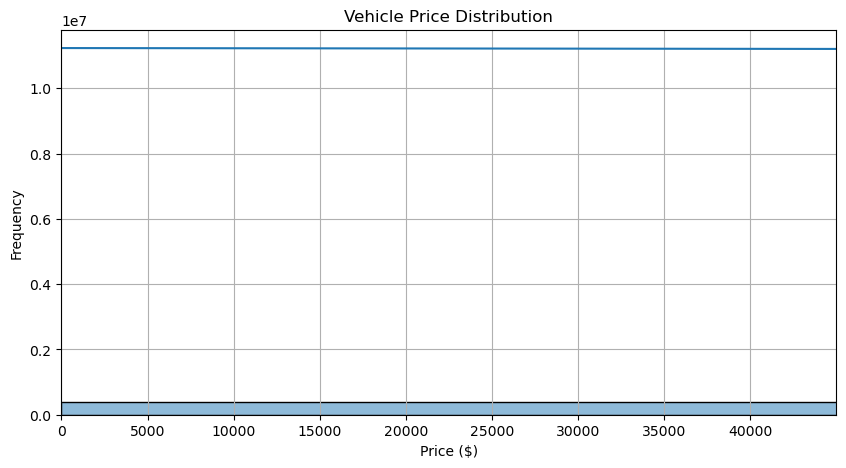

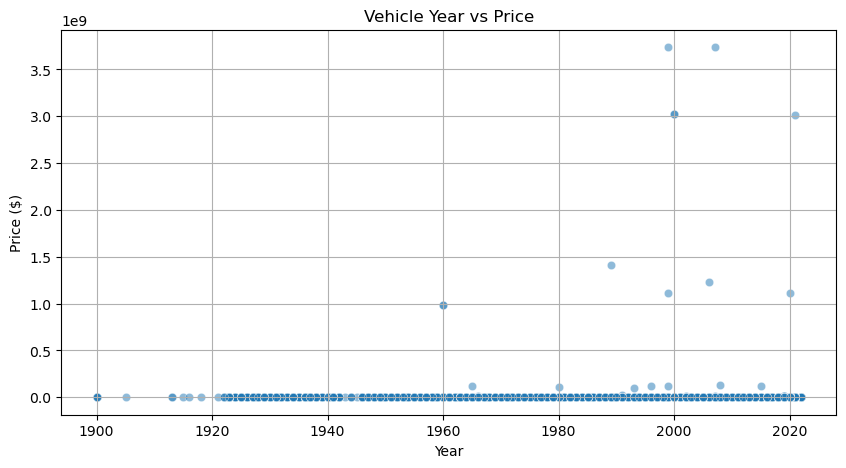

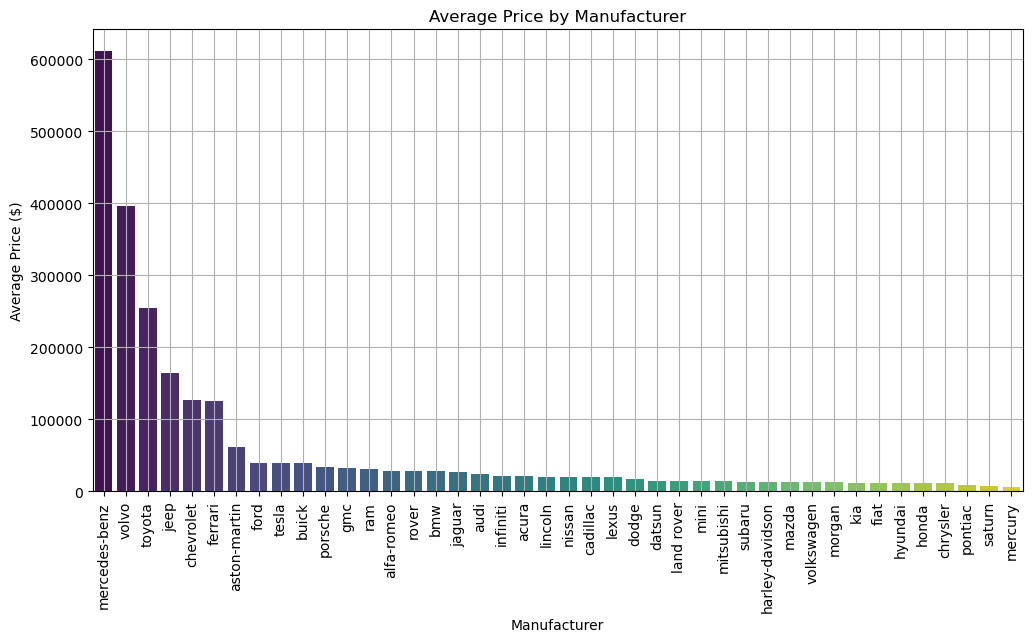

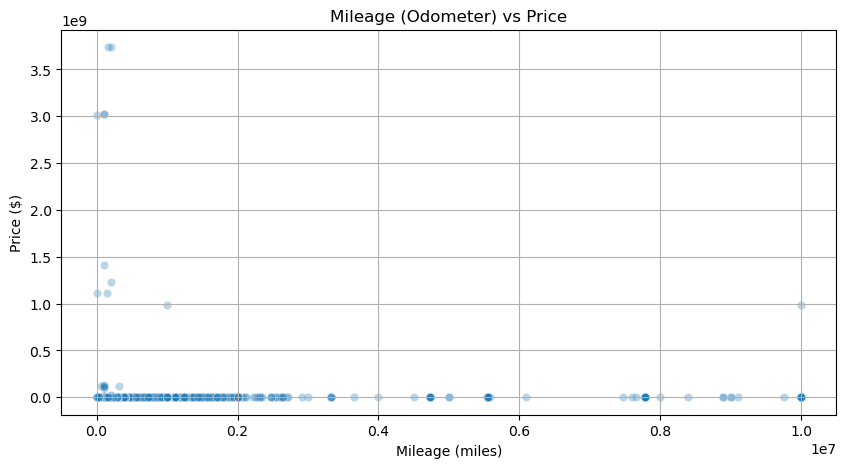

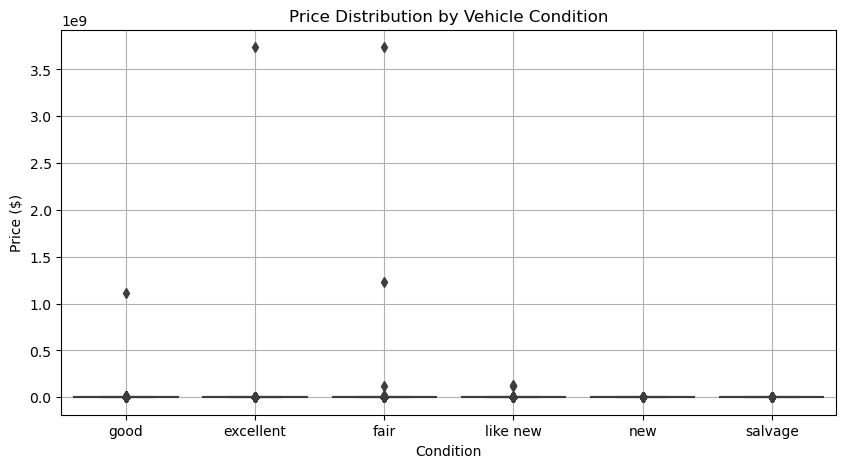

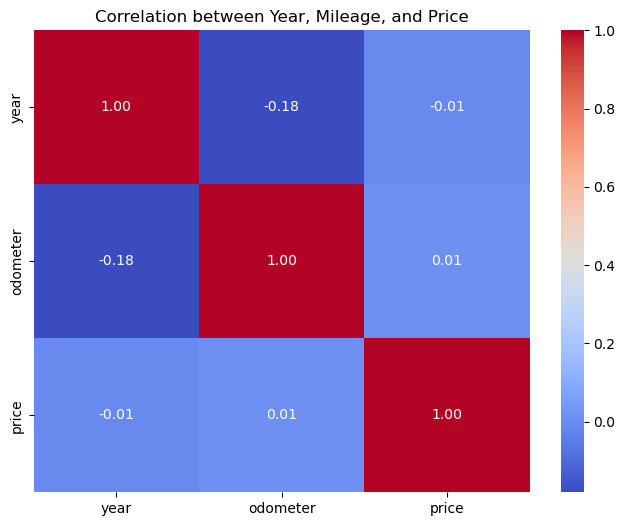

In [86]:
# studying various plots in relation with price 
# --- Price Distribution ---
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Vehicle Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.xlim(0, df['price'].quantile (0.95))  # Focus on 95% percentile to avoid extreme outliers
plt.grid(True)
plt.show()

# --- Year vs Price Scatter ---
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='year', y='price', alpha=0.5)
plt.title('Vehicle Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

# --- Manufacturer vs Average Price ---
plt.figure(figsize=(12, 6))
avg_price = df.groupby('manufacturer')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price.index, y=avg_price.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Average Price by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()

# --- Odometer vs Price Scatter ---
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='odometer', y='price', alpha=0.3)
plt.title('Mileage (Odometer) vs Price')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

# --- Condition vs Price Boxplot ---
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='condition', y='price')
plt.title('Price Distribution by Vehicle Condition')
plt.xlabel('Condition')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

# --- Correlation Heatmap ---
numerical_cols = ['year', 'odometer', 'price']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Year, Mileage, and Price')
plt.show()



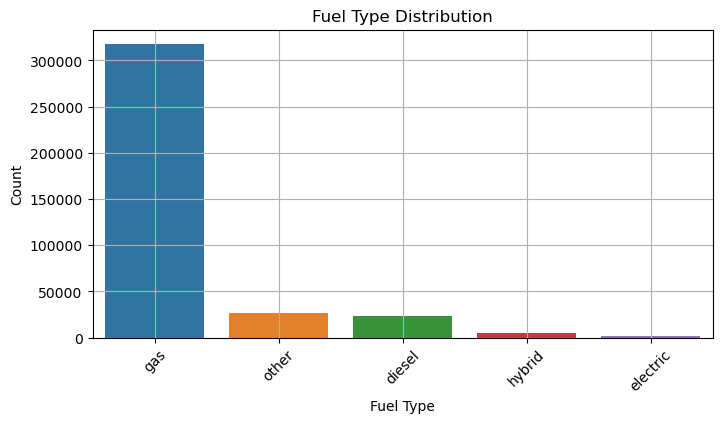

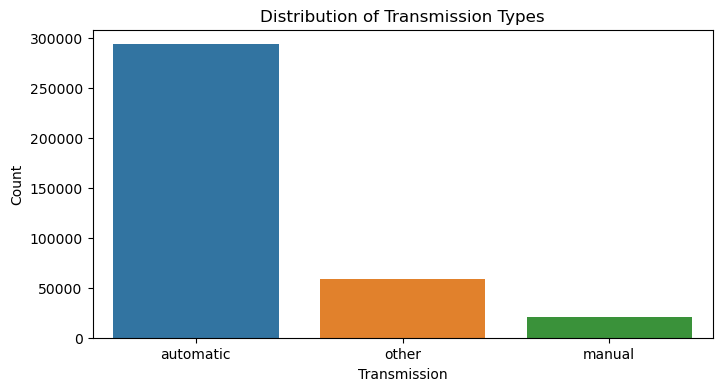

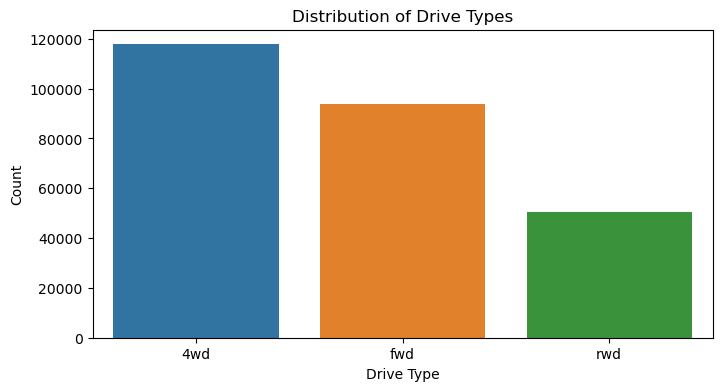

In [87]:
# General plots that are not tied to price
# --- Fuel Type Distribution ---
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='fuel', order=df['fuel'].value_counts().index)
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Transmission Type Counts
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='transmission', order=df['transmission'].value_counts().index)
plt.title('Distribution of Transmission Types')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()

# Drive Type Counts
# ------------------------
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='drive', order=df['drive'].value_counts().index)
plt.title('Distribution of Drive Types')
plt.xlabel('Drive Type')
plt.ylabel('Count')
plt.show()


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [89]:
#remove duplicates
df = df.drop_duplicates()
df.shape

# --- Remove listings with unreasonable 'price' ---
df = df[(df['price'] > 100) & (df['price'] < 500000)]  # Only keep reasonable prices

# Drop rows where important fields are missing
important_cols = ['year', 'manufacturer', 'model', 'odometer', 'fuel', 'title_status', 'transmission', 'drive', 'type']
df = df.dropna(subset=important_cols)

# Fill missing values for less critical fields
df['cylinders'] = df['cylinders'].fillna('unknown')
df['condition'] = df['condition'].fillna('unknown')
df['paint_color'] = df['paint_color'].fillna('unknown')

# --- Fix data types ---
df['year'] = df['year'].astype(int)
df['odometer'] = df['odometer'].astype(float)

# Only keep cars manufactured between 1980 and current year+1
from datetime import datetime
current_year = datetime.now().year
df = df[(df['year'] >= 1960) & (df['year'] <= current_year + 1)]

# --- Standardize text columns to lower case without extra spaces ---
text_columns = ['manufacturer', 'model', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'condition', 'cylinders']
for col in text_columns:
    df[col] = df[col].str.lower().str.strip()

# --- Create useful new features ---
# Example: Vehicle age
df['vehicle_age'] = current_year - df['year']
df['odometer_per_year'] = df['odometer'] / (df['vehicle_age'] + 0.1)  # Add small value to avoid div by zero


# --- Reset index ---
df = df.reset_index(drop=True)

# --- Dropping Non-critical columns and column with most missing value
df = df.drop(['VIN', 'size','paint_color', 'region', 'state'], axis=1)

# --- Final checks ---
print("Cleaned dataset shape:", df.shape)
print("Missing values after cleanup:\n", df.isnull().sum())

# Save cleaned data
df.to_csv("vehicles_cleaned.csv", index=False)


Cleaned dataset shape: (224073, 15)
Missing values after cleanup:
 id                   0
price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission         0
drive                0
type                 0
vehicle_age          0
odometer_per_year    0
dtype: int64


Text(0.5, 1.0, 'Vehcile Odometer')

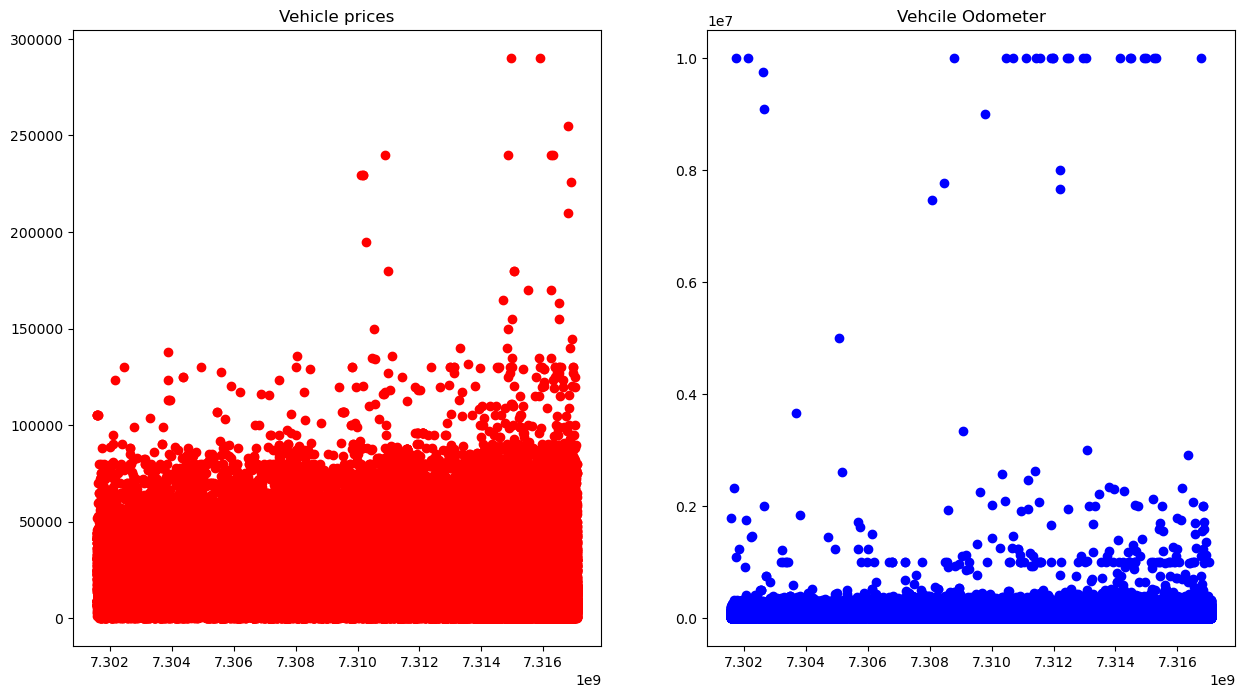

In [90]:
#Identifying pricing Outlier removal
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].scatter(df['id'], df['price'], c='red', marker='o', label='Data 1')
axes[0].set_title('Vehicle prices')
axes[1].scatter(df['id'], df['odometer'], c='blue', marker='o', label='Data 2')
axes[1].set_title('Vehcile Odometer')

Number of remaining records after price outliers removed: (219426, 15)
Number of remaining records after odometer outliers removed: (217822, 15)


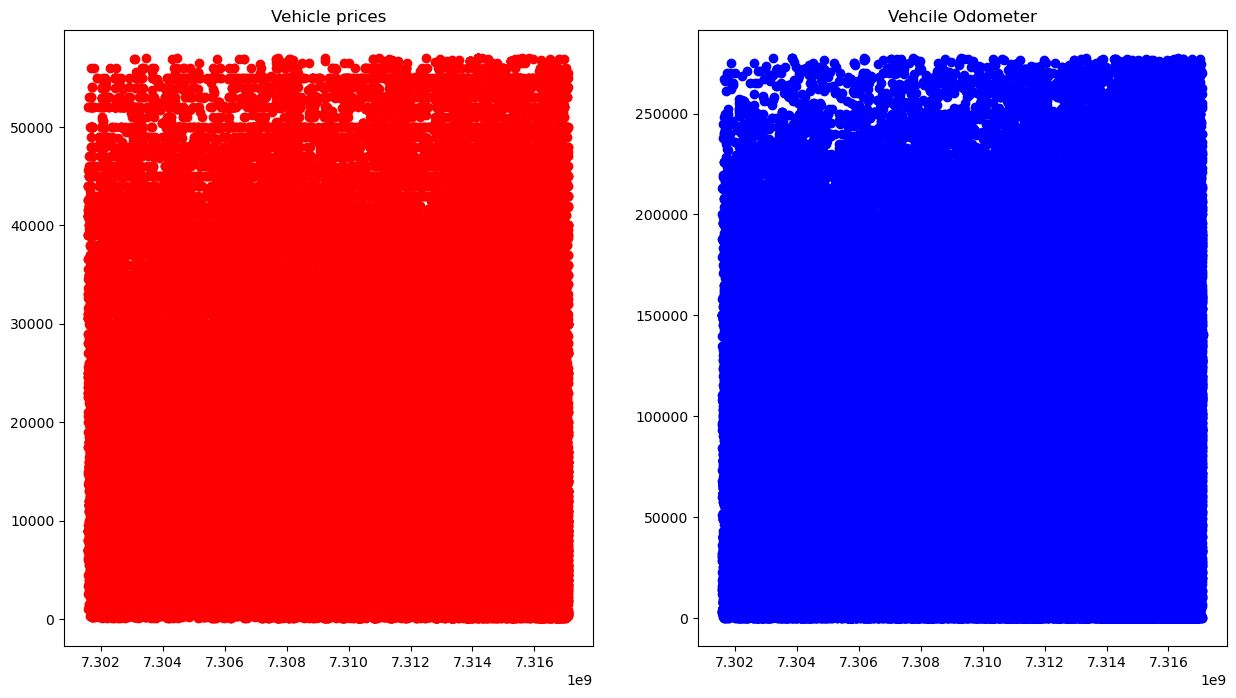

In [91]:
#Removing Outliers for

def filter_outliers_iqr(df, column_name, multiplier=1.5):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    df_filtered = df[~((df[column_name] < lower_bound) | (df[column_name] > upper_bound))]
    return df_filtered

#removing price outliers
clean_df = filter_outliers_iqr(df.copy(),'price')
print( f"Number of remaining records after price outliers removed: {clean_df.shape}")

#removing odometer outliers
clean_df = filter_outliers_iqr(clean_df,'odometer')
print( f"Number of remaining records after odometer outliers removed: {clean_df.shape}")

#Validating Outlier removal
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].scatter(clean_df['id'], clean_df['price'], c='red', marker='o', label='Data 1')
axes[0].set_title('Vehicle prices')
axes[1].scatter(clean_df['id'], clean_df['odometer'], c='blue', marker='o', label='Data 2')
axes[1].set_title('Vehcile Odometer')

#Drop ID
df=clean_df.drop('id', axis=1)

In [92]:
# Encode all the columns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from category_encoders import TargetEncoder

# --- Label Encode ordinal features ---
# Define a manual order for 'condition'
condition_order = {
    'new': 5,
    'like new': 4,
    'excellent': 3,
    'good': 2,
    'fair': 1,
    'salvage': 0,
    'unknown': -1
}
df['condition_encoded'] = df['condition'].map(condition_order)

# Map 'cylinders' roughly into a number
cylinder_mapping = {
    '3 cylinders': 3,
    '4 cylinders': 4,
    '5 cylinders': 5,
    '6 cylinders': 6,
    '8 cylinders': 8,
    '10 cylinders': 10,
    '12 cylinders': 12,
    'other': -1,
    'unknown': -1
}
df['cylinders_encoded'] = df['cylinders'].map(cylinder_mapping)

# --- Step 2: One-Hot Encode nominal categorical features ---
onehot_cols = ['fuel', 'title_status', 'transmission', 'drive', 'type']

# Create one-hot encoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_encoded = ohe.fit_transform(df[onehot_cols])

# Create dataframe with proper column names
ohe_df = pd.DataFrame(ohe_encoded, columns=ohe.get_feature_names_out(onehot_cols))

# Concatenate back to original dataframe
df_encoded = pd.concat([df.reset_index(drop=True), ohe_df.reset_index(drop=True)], axis=1)

# Drop original one-hot columns
df_encoded = df_encoded.drop(columns=onehot_cols)

# --- Step 3: Target Encode high-cardinality columns ---
target_col = 'price'

# Example: encode 'manufacturer'
te = TargetEncoder()
df_encoded['manufacturer_encoded'] = te.fit_transform(df_encoded['manufacturer'], df_encoded[target_col])

# Drop original manufacturer column
df_encoded = df_encoded.drop(columns=['manufacturer', 'model', 'condition', 'cylinders'])

# --- Final ---
print("Dataset shape after encoding:", df_encoded.shape)
df_encoded.head()



Dataset shape after encoding: (217822, 38)


,price,year,odometer,vehicle_age,odometer_per_year,condition_encoded,cylinders_encoded,fuel_diesel,fuel_electric,fuel_gas,...,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_suv,type_truck,type_van,type_wagon,manufacturer_encoded
0,15000,2013,128000.0,12,10578.512397,3,6,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20025.553384
1,27990,2012,68696.0,13,5243.969466,2,8,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,23810.294446
2,34590,2016,29499.0,9,3241.648352,2,6,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19461.737473
3,35000,2019,43000.0,6,7049.180328,3,6,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17357.195990
4,29990,2016,17302.0,9,1901.318681,2,6,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19461.737473


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [94]:
# --- Prepare X and y feature set ---
X = df_encoded.drop(columns=['price'])  # Features
y = df_encoded['price']  # Target price

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Scale the data ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [127]:
# --- Build models ---
def execute_regression_models(X_trn,y_trn, X_tst, y_tst, skip_lasso=True):
    
    models = {}

    # creating Linear Regressor and adding to the modle collection
    lr = LinearRegression()
    models['Linear Regression'] = lr

    # creating ridge Regressor with Grid Search and added to the model collection
    ridge_params = {'alpha': np.logspace(-3, 3, 25)}
    #ridge_params = {'alpha': 10**np.linspace(10,-2,100)*0.5}
    ridge = Ridge()
    ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
    models['Ridge Regression'] = ridge_cv

    # Skip Lasso as it is too slow and the results of Lasso and Ridge are pretty much similar
    if (skip_lasso ==False):
        #Creating Lasso Regressor with Grid Search and added to the model collection
        lasso_params = {'alpha': np.logspace(-3, 3, 10)}
        lasso = Lasso(max_iter=5000)
        lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
        models['Lasso Regression'] = lasso_cv

    # --- Cross-validation and model comparison ---
    results = {}

    for name, model in models.items():
        #model training
        #model.fit(X_train_scaled, y_train)
        model.fit(X_trn, y_trn)
        #model prediction against the test set 
        #preds = model.predict(X_test_scaled)
        preds = model.predict(X_tst)
        
        # Storing model performance values 
        #mse = mean_squared_error(y_test, preds)
        mse = mean_squared_error(y_tst, preds)
        rmse = np.sqrt(mse)
        #r2 = r2_score(y_test, preds)
        r2 = r2_score(y_tst, preds)
        results[name] = {'RMSE': rmse, 'R2': r2}
    return results,models

results,model = execute_regression_models(X_train_scaled,y_train, X_test_scaled, y_test)

# Display results of each model performance
results_df = pd.DataFrame(results).T
print(" Model Evaluation:\n", results_df)

#Best model
best_model = results_df.sort_values('RMSE').head(1)
print("\n🥇 Best Performing Model:\n", best_model)

 Model Evaluation:
                           RMSE        R2
Linear Regression  7286.201950  0.658376
Ridge Regression   7286.201521  0.658376

🥇 Best Performing Model:
                          RMSE        R2
Ridge Regression  7286.201521  0.658376


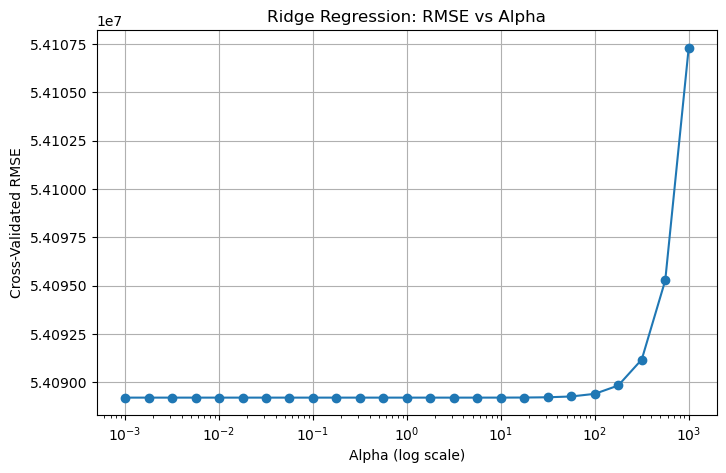

In [131]:
# Extract results from ridge GridSearchCV
results = model['Ridge Regression'].cv_results_
alphas = results['param_alpha'].data  
scores = -results['mean_test_score']         

# Plot RMSE vs Alpha
plt.figure(figsize=(8, 5))
plt.plot(alphas, scores, marker='o')
plt.xscale('log')
plt.title("Ridge Regression: RMSE vs Alpha")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Cross-Validated RMSE")
plt.grid(True)
plt.show()

In [133]:
#Try Feature Selection to see if the score can be improved further.

lasso = LassoCV(cv=5, random_state=42, max_iter=5000)
lasso.fit(X_train_scaled, y_train)

lasso_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\n🔍 Lasso Feature Importance:")
print(lasso_coefficients)

# Top 25 features didn't result in much difference in model performance


🔍 Lasso Feature Importance:
                    Feature  Coefficient
0                      year  2622.565644
3         odometer_per_year  2129.936570
6               fuel_diesel  1788.466995
30              type_pickup  1319.225365
36     manufacturer_encoded  1302.125898
33               type_truck  1263.189997
19       transmission_other  1051.876616
20                drive_4wd   538.125106
11       title_status_clean   533.351063
25               type_coupe   345.770852
12        title_status_lien   201.072332
29               type_other   142.842707
24         type_convertible   136.853921
10               fuel_other   128.318142
28             type_offroad   108.304866
5         cylinders_encoded   101.012419
34                 type_van    48.590465
22                drive_rwd     0.000000
18      transmission_manual     0.000000
13     title_status_missing     0.000000
9               fuel_hybrid    -0.000000
2               vehicle_age    -0.309121
27            type_mini-van 

In [135]:
# Try LinearRegression for feature selection to see if model could be simplified with fewer features resulting in better performance.
rfe_estimator = LinearRegression()
rfe = RFE(estimator=rfe_estimator, n_features_to_select=25)  # Select top 25 features
rfe.fit(X_train_scaled, y_train)

rfe_features = pd.DataFrame({
    'Feature': X.columns,
    'Selected': rfe.support_
})

print(rfe_features[rfe_features['Selected'] == True])

                   Feature  Selected
0                     year      True
1                 odometer      True
2              vehicle_age      True
3        odometer_per_year      True
4        condition_encoded      True
6              fuel_diesel      True
8                 fuel_gas      True
10              fuel_other      True
11      title_status_clean      True
12       title_status_lien      True
16    title_status_salvage      True
17  transmission_automatic      True
18     transmission_manual      True
19      transmission_other      True
20               drive_4wd      True
21               drive_fwd      True
22               drive_rwd      True
25              type_coupe      True
26          type_hatchback      True
30             type_pickup      True
31              type_sedan      True
32                type_suv      True
33              type_truck      True
35              type_wagon      True
36    manufacturer_encoded      True


In [137]:
#Selecting the most influencial features from the larger set.
#selected_features = ['year', 'fuel_diesel', 'type_pickup', 'manufacturer_encoded', 'type_truck', 'transmission_other', 'drive_4wd', 'title_status_clean', 'type_coupe', 'type_other', 'title_status_lien', 'type_convertible', 'fuel_other', 'odometer', 'drive_fwd', 'type_sedan', 'type_hatchback', 'type_suv','type_wagon', 'condition_encoded']
selected_features = rfe_features[rfe_features['Selected'] == True]['Feature']

# Find the indexes of these features
feature_names = X_train.columns.tolist()
selected_indexes = [feature_names.index(feature) for feature in selected_features]

# Filtering the test and training set
feature_test_set = X_test_scaled[ :, selected_indexes]
feature_train_set = X_train_scaled[ :, selected_indexes] 



In [141]:
#Executing the model for the selected feature set
results,model = execute_regression_models(feature_train_set,y_train, feature_test_set, y_test)

# Display results of each model performance
results_df = pd.DataFrame(results).T
print(" Model Evaluation:\n", results_df)

#Best model
best_model = results_df.sort_values('RMSE').head(1)
print("\n Best Performing Model:\n", best_model)


 Model Evaluation:
                           RMSE       R2
Linear Regression  7289.570193  0.65806
Ridge Regression   7289.569503  0.65806

 Best Performing Model:
                          RMSE       R2
Ridge Regression  7289.569503  0.65806


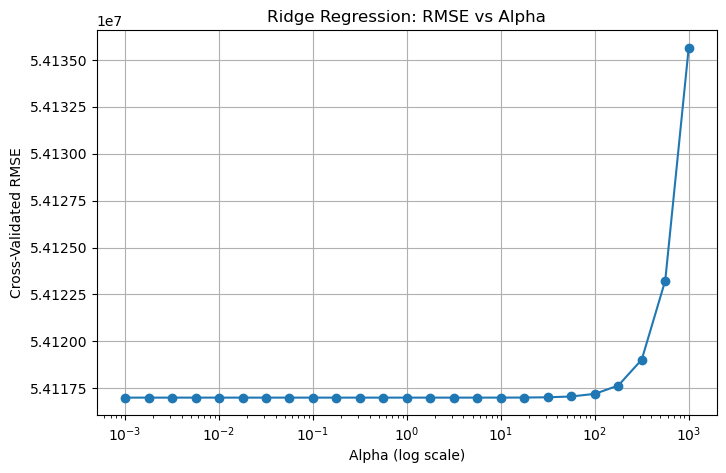

In [143]:
# Extract results from ridge GridSearchCV
results = model['Ridge Regression'].cv_results_
alphas = results['param_alpha'].data  
scores = -results['mean_test_score']         

# Plot RMSE vs Alpha
plt.figure(figsize=(8, 5))
plt.plot(alphas, scores, marker='o')
plt.xscale('log')
plt.title("Ridge Regression: RMSE vs Alpha")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Cross-Validated RMSE")
plt.grid(True)
plt.show()

Observation:
Feature selection didn't help improve the model performance.

In [146]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [148]:
from xgboost import XGBRegressor
# Train XGBoost with Hyperparameter Tuning ---

xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid Search CV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,
                           scoring='r2', verbose=1, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

# Best model
best_xgb = grid_search.best_estimator_

# --- Step 5: Evaluate Model ---

y_pred_train = best_xgb.predict(X_train_scaled)
y_pred_test = best_xgb.predict(X_test_scaled)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("\n Train R2:", train_r2)
print(" Test R2:", test_r2)
print(" Train RMSE:", train_rmse)
print(" Test RMSE:", test_rmse)

Fitting 5 folds for each of 108 candidates, totalling 540 fits

 Train R2: 0.8981863856315613
 Test R2: 0.8707295656204224
 Train RMSE: 3983.9282122046325
 Test RMSE: 4482.046853838099


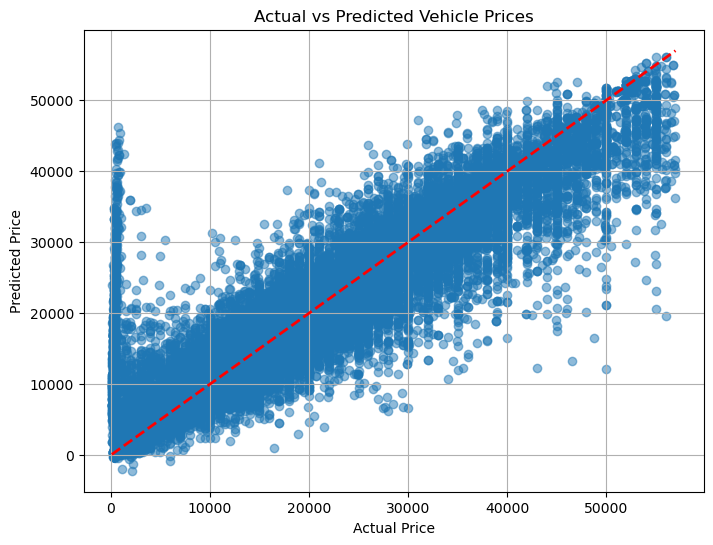

In [150]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Vehicle Prices')
plt.grid(True)
plt.show()




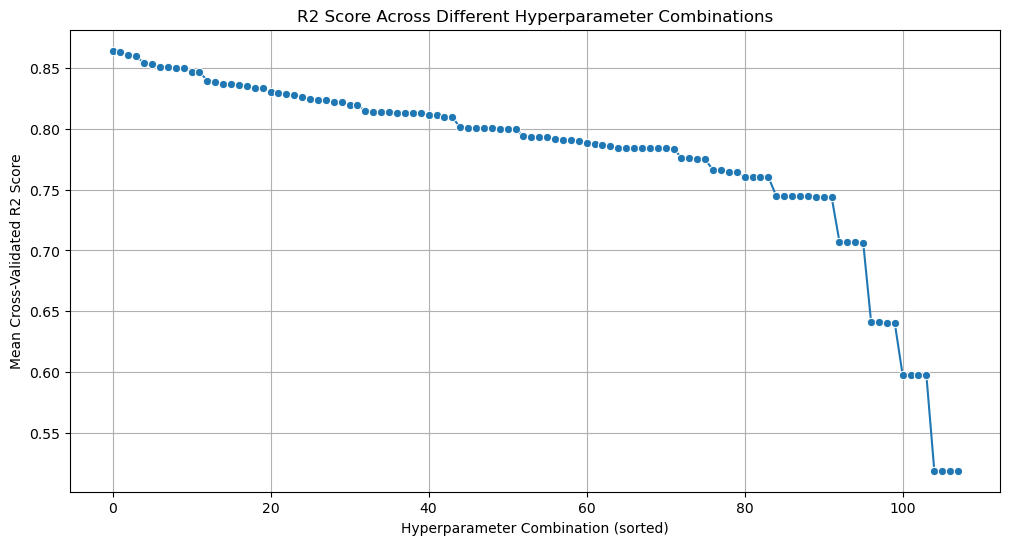

In [152]:
# Hyperparameter Tuning Results from GridSearchCV

# Assume you did a GridSearchCV named `grid_search`
# We'll extract and plot R2 scores for each set of hyperparameters

cv_results = pd.DataFrame(grid_search.cv_results_)

# Sort by mean test score
cv_results = cv_results.sort_values('mean_test_score', ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(data=cv_results, x=range(len(cv_results)), y='mean_test_score', marker='o')
plt.title('R2 Score Across Different Hyperparameter Combinations')
plt.xlabel('Hyperparameter Combination (sorted)')
plt.ylabel('Mean Cross-Validated R2 Score')
plt.grid(True)
plt.show()


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

# Model Comparison Summary

| Model | RMSE ($) | R² Score | Notes |
| ----- | -------- | -------- | ----- |
| Ridge Regression | 7289.569503 | 0.65806 | α=100 |
| Multiple Linear Regression | 7289.570193 | 0.65806 | Similar to Ridge model performance |
| **XGBoost | 3983.9282 | 0.8981 | Best model Performance |

## Summary
XGBoost regressors performed best. Further accuracy can be achieved by better scaling certain features, addressing outliers more effectively and possible polynomial feature engineering.
-  Key price drivers include vehicle age, mileage, manufacturer, and condition. 
    - Newer vehicles or vehicles with low odometer reading has better price value. 
    - Certain makes retain value much better. 
    - Condition of the vehicle has significant impact on the price. 
    - Title status has a massive impact. Salvage titles can reduce the price significantly. 
    - Diesel engines and truck retain value better than economy models.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

## Business Objective Recap
- Client: Used car dealership.
- Objective: Identify what factors drive vehicle pricing to better advise sellers/buyers and optimize inventory pricing.
- Technical Goal: Build robust predictive models to explain price variations.

## Modeling Summary
- Exploratory Data Analysis (EDA): Important relationships — e.g., condition, odometer, year, manufacturer were visualized.
- Feature Engineering:
  - Label encoding and scaling performed.
  - Polynomial features is an opportunity, that can possibly be leveraged.
- Modeling Approaches:
  - Linear Regression (Baseline)
  - Lasso Regression (L1 Regularization)
  - Ridge Regression (L2 Regularization)
  - GridSearchCV and KFold cross-validation for hyperparameter tuning.
  - Finally XGBoost was leveraged as exploratory regressor for improving model performance
- Evaluation Metric: R² Score.
- Current Best Model Performance:
  - R² ~ 0.65–0.66 (For regressor models like MultiLinear, Ridge, and Lasso regressors leaving decent but room to improve).
  - R² ~ 0.87 - 0.89 for XGBoost regressor.

## Key Insights from Data
- Odometer: Strong negative correlation with price.
- Vehicle Year: Newer models command higher prices.
- Condition: Major driver; 'Excellent' and 'Like New' vehicles are priced significantly higher.
- Manufacturer Effects: Certain brands (e.g., Lexus, BMW, Toyota) have premium pricing.
- Type/Body Style: SUVs, trucks tend to be higher priced than sedans or hatchbacks.

## Client recommedation:
Key price drivers include vehicle age, mileage, manufacturer, and condition. 
  - Newer vehicles or vehicles with low odometer reading has better price value. 
  - Certain makes retain value much better. 
  - Condition of the vehicle has significant impact on the price. 
  - Title status has a massive impact. Salvage titles can reduce the price significantly. 
  - Diesel engines and truck retain value better than economy models. 

**For even better accuracy, additional richer feature set like vehicle history for feature engineering could be leveraged**. 
